In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import networkx as nx

# Load the dataset
dataset = pd.read_csv('Attrition_fnl.csv')


# Define selected columns for the graph (consider relationships)
selected_columns = ['MonthlyIncome', 'Age', 'StockOptionLevel', 'OverTime', 'TotalWorkingYears', 'MonthlyRate', 'YearsAtCompany', 'EmployeeNumber', 'DailyRate', 'DistanceFromHome',
                    'HourlyRate', 'YearsWithCurrManager', 'PercentSalaryHike', 'JobInvolvement', 'EnvironmentSatisfaction', 'NumCompaniesWorked', 'JobSatisfaction',
                    'YearsInCurrentRole', 'RelationshipSatisfaction', 'JobLevel', 'YearsSinceLastPromotion', 'MaritalStatus', 'BusinessTravel', 'Attrition']

# Create a new DataFrame with selected columns
df_attrition = dataset[selected_columns]


# Separate features and target variable
X = df_attrition.drop(columns=['Attrition'])
y = df_attrition['Attrition']
y = np.array(list(map(lambda label: 1 if label == "Yes" else 0, df_attrition["Attrition"])))

# Create a graph
G = nx.Graph()

# Add nodes and node features to the graph
for idx, row in X.iterrows():
    employee_number = row['EmployeeNumber']
    G.add_node(employee_number, attr_dict = row.drop('EmployeeNumber').to_dict())

# Add edges based on 'BusinessTravel' and 'Gender'
for idx, row in X.iterrows():
    employee_number = row['EmployeeNumber']
    MonthlyIncome = row['MonthlyIncome']
    Age = row['Age']
    StockOptionLevel = row['StockOptionLevel']
    OverTime = row['OverTime']
    TotalWorkingYears = row['TotalWorkingYears']
    MonthlyRate = row['MonthlyRate']
    YearsAtCompany = row['YearsAtCompany']
    #MonthlyRate = row['EmployeeNumber']
    DailyRate = row['DailyRate']
    DistanceFromHome = row['DistanceFromHome']
    HourlyRate = row['HourlyRate']
    YearsWithCurrManager = row['YearsWithCurrManager']
    PercentSalaryHike = row['PercentSalaryHike']
    JobInvolvement = row['JobInvolvement']
    EnvironmentSatisfaction = row['EnvironmentSatisfaction']
    NumCompaniesWorked = row['NumCompaniesWorked']
    JobSatisfaction = row['JobSatisfaction']
    YearsInCurrentRole = row['YearsInCurrentRole']
    RelationshipSatisfaction = row['RelationshipSatisfaction']
    JobLevel = row['JobLevel']
    YearsSinceLastPromotion = row['YearsSinceLastPromotion']
    MaritalStatus = row['MaritalStatus']
    BusinessTravel = row['BusinessTravel']


    G.add_edge(employee_number, MonthlyIncome)
    G.add_edge(employee_number, Age)
    G.add_edge(employee_number, StockOptionLevel)
    G.add_edge(employee_number, OverTime)
    G.add_edge(employee_number, TotalWorkingYears)
    G.add_edge(employee_number, MonthlyRate)
    G.add_edge(employee_number, YearsAtCompany)
    G.add_edge(employee_number, DailyRate)
    G.add_edge(employee_number, DistanceFromHome)
    G.add_edge(employee_number, HourlyRate)
    G.add_edge(employee_number, YearsWithCurrManager)
    G.add_edge(employee_number, PercentSalaryHike)
    G.add_edge(employee_number, JobInvolvement)
    G.add_edge(employee_number, EnvironmentSatisfaction)
    G.add_edge(employee_number, NumCompaniesWorked)
    G.add_edge(employee_number, JobSatisfaction)
    G.add_edge(employee_number, YearsInCurrentRole)
    G.add_edge(employee_number, RelationshipSatisfaction)
    G.add_edge(employee_number, JobLevel)
    G.add_edge(employee_number, YearsSinceLastPromotion)
    G.add_edge(employee_number, MaritalStatus)
    G.add_edge(employee_number, BusinessTravel)

# Convert the graph to a node feature matrix
X_graph = nx.to_pandas_adjacency(G)
# Get the common indices between X_graph and X
common_indices = list(set(X_graph.index) & set(X.index))

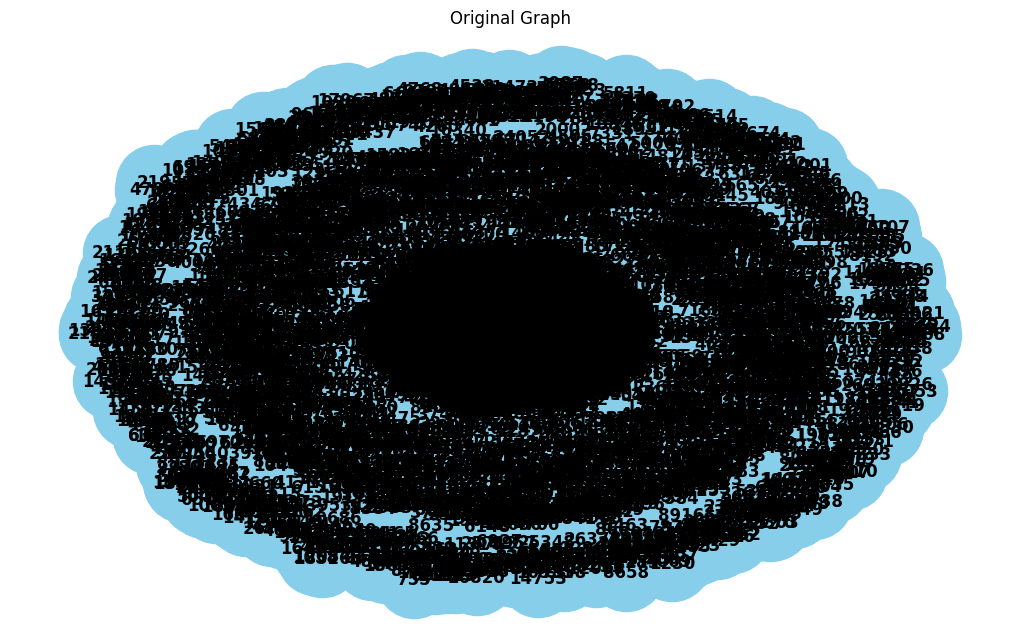

In [2]:
import matplotlib.pyplot as plt

# Plot the original graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Original Graph")
plt.show()

In [3]:
print("\nNode values in original graph:")
for node, data in G.nodes(data=True):
    print(node, data)

Streaming output truncated to the last 5000 lines.
944 {'attr_dict': {'MonthlyIncome': 7403, 'Age': 49, 'StockOptionLevel': 1, 'OverTime': 'No', 'TotalWorkingYears': 29, 'MonthlyRate': 22477, 'YearsAtCompany': 26, 'DailyRate': 527, 'DistanceFromHome': 8, 'HourlyRate': 51, 'YearsWithCurrManager': 7, 'PercentSalaryHike': 11, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 1, 'NumCompaniesWorked': 4, 'JobSatisfaction': 2, 'YearsInCurrentRole': 9, 'RelationshipSatisfaction': 3, 'JobLevel': 3, 'YearsSinceLastPromotion': 1, 'MaritalStatus': 'Married', 'BusinessTravel': 'Travel_Rarely'}}
945 {'attr_dict': {'MonthlyIncome': 2259, 'Age': 48, 'StockOptionLevel': 2, 'OverTime': 'No', 'TotalWorkingYears': 13, 'MonthlyRate': 5543, 'YearsAtCompany': 0, 'DailyRate': 1469, 'DistanceFromHome': 20, 'HourlyRate': 51, 'YearsWithCurrManager': 0, 'PercentSalaryHike': 17, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 4, 'NumCompaniesWorked': 4, 'JobSatisfaction': 3, 'YearsInCurrentRole': 0, 'RelationshipSa

In [4]:
import copy

# Create a copy of the original graph
G_copy = copy.deepcopy(G)

first_3150_nodes = list(G_copy.nodes())[:3150]

# Remove all nodes except the first 3150 nodes from the copied graph
nodes_to_remove = set(G_copy.nodes()) - set(first_3150_nodes)
G_copy.remove_nodes_from(nodes_to_remove)

print("\nNode values in copied graph:")
for node, data in G_copy.nodes(data=True):
    print(node, data)


Node values in copied graph:
1 {'attr_dict': {'MonthlyIncome': 5993, 'Age': 41, 'StockOptionLevel': 0, 'OverTime': 'Yes', 'TotalWorkingYears': 8, 'MonthlyRate': 19479, 'YearsAtCompany': 6, 'DailyRate': 1102, 'DistanceFromHome': 1, 'HourlyRate': 94, 'YearsWithCurrManager': 5, 'PercentSalaryHike': 11, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 2, 'NumCompaniesWorked': 8, 'JobSatisfaction': 4, 'YearsInCurrentRole': 4, 'RelationshipSatisfaction': 1, 'JobLevel': 2, 'YearsSinceLastPromotion': 0, 'MaritalStatus': 'Single', 'BusinessTravel': 'Travel_Rarely'}}
2 {'attr_dict': {'MonthlyIncome': 5130, 'Age': 49, 'StockOptionLevel': 1, 'OverTime': 'No', 'TotalWorkingYears': 10, 'MonthlyRate': 24907, 'YearsAtCompany': 10, 'DailyRate': 279, 'DistanceFromHome': 8, 'HourlyRate': 61, 'YearsWithCurrManager': 7, 'PercentSalaryHike': 23, 'JobInvolvement': 2, 'EnvironmentSatisfaction': 3, 'NumCompaniesWorked': 1, 'JobSatisfaction': 2, 'YearsInCurrentRole': 7, 'RelationshipSatisfaction': 4, 'JobLevel'

In [5]:
X_graph_copy = nx.to_pandas_adjacency(G_copy)
#print(X_graph_copy)
# Split data into training and testing sets
from imblearn.over_sampling import SMOTE

# Check for class imbalance in y
if len(np.unique(y)) == 2 and np.bincount(y)[0] != np.bincount(y)[1]:
    smote = SMOTE(sampling_strategy='auto')
    X_graph_copy, y = smote.fit_resample(X_graph_copy, y)
X_train, X_test, y_train, y_test = train_test_split(X_graph_copy, y, test_size=0.2, random_state=42)

In [6]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.LongTensor(y_test)


In [7]:
# Define a simple Graph Neural Network model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [8]:
# Instantiate the model
input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = 2  # Binary classification
model = GNNModel(input_dim, hidden_dim, output_dim)

# Train the model
optimizer = Adam(model.parameters(), lr=0.01)

In [9]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(X_train_tensor)
    loss = F.nll_loss(out, y_train_tensor)
    loss.backward()
    optimizer.step()
    return loss.item()

# Test the model
def test():
    model.eval()
    out = model(X_train_tensor)
    pred = model(X_test_tensor).argmax(dim=1)
    test_correct = pred == torch.LongTensor(y_test)
    test_acc = int(test_correct.sum()) / len(y_test)
    return test_acc

In [10]:
# Train the model and evaluate its performance
for epoch in range(200):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

Epoch: 1, Loss: 0.6995, Accuracy: 0.5180
Epoch: 2, Loss: 0.6925, Accuracy: 0.7023
Epoch: 3, Loss: 0.6684, Accuracy: 0.6553
Epoch: 4, Loss: 0.6627, Accuracy: 0.6756
Epoch: 5, Loss: 0.6421, Accuracy: 0.7143
Epoch: 6, Loss: 0.6244, Accuracy: 0.7382
Epoch: 7, Loss: 0.6057, Accuracy: 0.7512
Epoch: 8, Loss: 0.5853, Accuracy: 0.7613
Epoch: 9, Loss: 0.5679, Accuracy: 0.7677
Epoch: 10, Loss: 0.5483, Accuracy: 0.7705
Epoch: 11, Loss: 0.5345, Accuracy: 0.7760
Epoch: 12, Loss: 0.5070, Accuracy: 0.7816
Epoch: 13, Loss: 0.4995, Accuracy: 0.7926
Epoch: 14, Loss: 0.4827, Accuracy: 0.8028
Epoch: 15, Loss: 0.4634, Accuracy: 0.8018
Epoch: 16, Loss: 0.4433, Accuracy: 0.8055
Epoch: 17, Loss: 0.4280, Accuracy: 0.8138
Epoch: 18, Loss: 0.4219, Accuracy: 0.8184
Epoch: 19, Loss: 0.4128, Accuracy: 0.8175
Epoch: 20, Loss: 0.3881, Accuracy: 0.8147
Epoch: 21, Loss: 0.3788, Accuracy: 0.8166
Epoch: 22, Loss: 0.3670, Accuracy: 0.8203
Epoch: 23, Loss: 0.3637, Accuracy: 0.8230
Epoch: 24, Loss: 0.3508, Accuracy: 0.8249
E

In [11]:
def accuracy():
    model.eval()
    out = model(X_train_tensor)
    pred = model(X_test_tensor).argmax(dim=1)
    test_correct = pred == torch.LongTensor(y_test)
    test_acc = int(test_correct.sum()) / len(y_test)
    return test_acc

test_accu = accuracy()
# print(test_accu)
predic = model(X_test_tensor).argmax(dim=1)
from sklearn.metrics import classification_report, roc_auc_score
print(f'Classification Report: GNN')
print(classification_report(y_test_tensor, predic, zero_division = 0))
auc_test = roc_auc_score(y_test_tensor, predic)
print(f'AUC Score: {auc_test}')

Classification Report: GNN
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       564
           1       0.83      0.99      0.90       521

    accuracy                           0.90      1085
   macro avg       0.91      0.90      0.90      1085
weighted avg       0.91      0.90      0.90      1085

AUC Score: 0.9030761220239311


<ipython-input-12-fd3a3c7211e4>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


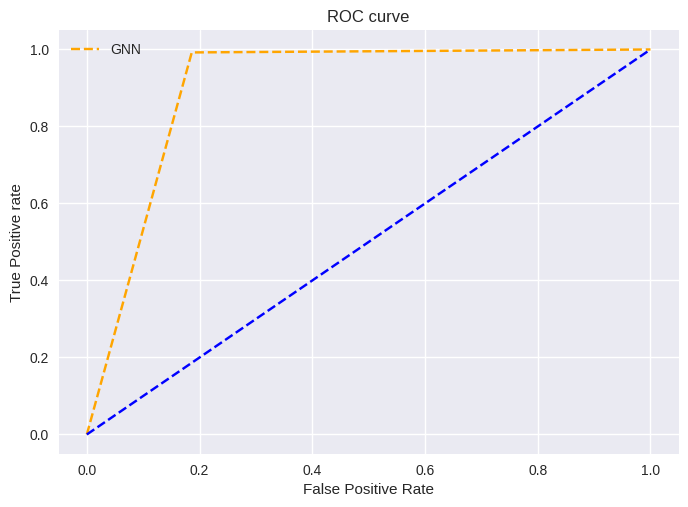

In [12]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predic, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();